## Regresión Avanzada

## Clase 4

In [24]:
suppressMessages( library( ggplot2 ) )
suppressMessages( library( carData ) )
suppressMessages( library( dplyr ) )
suppressMessages( library( tidyverse ) )
suppressMessages( library( car ) )
suppressMessages( library( MASS ) )
suppressMessages( library( pgirmess ) )
suppressMessages( library( lsr ) )
suppressMessages( library( quantreg ) )

## 1. Variables Regresoras Categóricas

### Una predictora categórica con dos niveles

Usamos los datos Salaries de la biblioteca carData de R.

In [4]:
mod1 <- lm( salary ~ sex, data = Salaries )
summary( mod1 )


Call:
lm(formula = salary ~ sex, data = Salaries)

Residuals:
   Min     1Q Median     3Q    Max 
-57290 -23502  -6828  19710 116455 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   101002       4809  21.001  < 2e-16 ***
sexMale        14088       5065   2.782  0.00567 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30030 on 395 degrees of freedom
Multiple R-squared:  0.01921,	Adjusted R-squared:  0.01673 
F-statistic: 7.738 on 1 and 395 DF,  p-value: 0.005667


Si queremos cambiar el nivel de base contra el que se contraste

In [6]:
# Veamos cómo crea automáticamente la dummy
print( contrasts( Salaries$sex ) )

# Si se desea recodificar el campo Sexo
Salaries <- Salaries %>% mutate( sex = relevel( sex, ref = "Male" ) )

       Female
Male        0
Female      1


In [7]:
# Veamos cómo queda el modelo cuando cambiamos el nivel de base
mod2 <- lm( salary ~ sex, data = Salaries )
summary( mod2 )


Call:
lm(formula = salary ~ sex, data = Salaries)

Residuals:
   Min     1Q Median     3Q    Max 
-57290 -23502  -6828  19710 116455 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   115090       1587  72.503  < 2e-16 ***
sexFemale     -14088       5065  -2.782  0.00567 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30030 on 395 degrees of freedom
Multiple R-squared:  0.01921,	Adjusted R-squared:  0.01673 
F-statistic: 7.738 on 1 and 395 DF,  p-value: 0.005667


Una variable categórica con n niveles, estas son transformadas a n-1 variables. La variable rank de la base Salaries tiene 3 niveles.

In [8]:
mod3 <- lm(salary ~ rank , data = Salaries )
summary( mod3 )


Call:
lm(formula = salary ~ rank, data = Salaries)

Residuals:
   Min     1Q Median     3Q    Max 
-68972 -16376  -1580  11755 104773 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      80776       2887  27.976  < 2e-16 ***
rankAssocProf    13100       4131   3.171  0.00164 ** 
rankProf         45996       3230  14.238  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23630 on 394 degrees of freedom
Multiple R-squared:  0.3943,	Adjusted R-squared:  0.3912 
F-statistic: 128.2 on 2 and 394 DF,  p-value: < 2.2e-16


¿Cómo es la matriz de contraste del factor rank?

In [13]:
contr <- model.matrix( ~ rank, data = Salaries )
print( head( contr[, -1] ) )

  rankAssocProf rankProf
1             0        1
2             0        1
3             0        0
4             0        1
5             0        1
6             1        0


### Dos predictoras categóricas

A partir de la salida, identificar la cantidad de niveles de cada variable categórica y el nivel base.

In [14]:
mod4 <- lm( salary ~ rank + discipline , data = Salaries )
summary( mod4 )


Call:
lm(formula = salary ~ rank + discipline, data = Salaries)

Residuals:
   Min     1Q Median     3Q    Max 
-65990 -14049  -1288  10760  97996 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      71944       3135  22.948  < 2e-16 ***
rankAssocProf    13762       3961   3.475 0.000569 ***
rankProf         47844       3112  15.376  < 2e-16 ***
disciplineB      13761       2296   5.993 4.65e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22650 on 393 degrees of freedom
Multiple R-squared:  0.445,	Adjusted R-squared:  0.4407 
F-statistic:   105 on 3 and 393 DF,  p-value: < 2.2e-16


### Una predictora categórica y otra continua

In [15]:
mod5 <- lm( salary ~ yrs.since.phd + discipline , data = Salaries )
summary( mod5 )


Call:
lm(formula = salary ~ yrs.since.phd + discipline, data = Salaries)

Residuals:
   Min     1Q Median     3Q    Max 
-79837 -16607  -4373  15679  93098 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    80158.3     3328.3  24.083  < 2e-16 ***
yrs.since.phd   1118.5      105.8  10.576  < 2e-16 ***
disciplineB    15784.2     2733.3   5.775 1.56e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 26470 on 394 degrees of freedom
Multiple R-squared:  0.2401,	Adjusted R-squared:  0.2362 
F-statistic: 62.24 on 2 and 394 DF,  p-value: < 2.2e-16


### Predictoras categóricas y continuas con interacción

In [17]:
antro$Sexo <- factor( antro$Sexo )
mod6 <- lm( Peso ~ Estatura*Sexo + Edad_meses , data = antro )
summary( mod6 )

ERROR: Error in factor(antro$Sexo): objeto 'antro' no encontrado


## 2. Modelo de una vía paramétrico

### Ejemplo Té

In [23]:
te <- data.frame(
  "Marca 1" = c(7.9, 6.2, 6.6, 8.6, 8.9, 10.1, 9.6),
  "Marca 2" = c(5.7, 7.5, 9.8, 6.1, 8.4, 7.2, NaN),
  "Marca 3" = c(6.8, 7.8, 5.1, 7.4, 5.3, 6.1, NaN),
  "Marca 4" = c(6.4, 7.1, 7.9, 4.5, 5.0, 4.0, NaN)
)

print(te)

  Marca.1 Marca.2 Marca.3 Marca.4
1     7.9     5.7     6.8     6.4
2     6.2     7.5     7.8     7.1
3     6.6     9.8     5.1     7.9
4     8.6     6.1     7.4     4.5
5     8.9     8.4     5.3     5.0
6    10.1     7.2     6.1     4.0
7     9.6     NaN     NaN     NaN


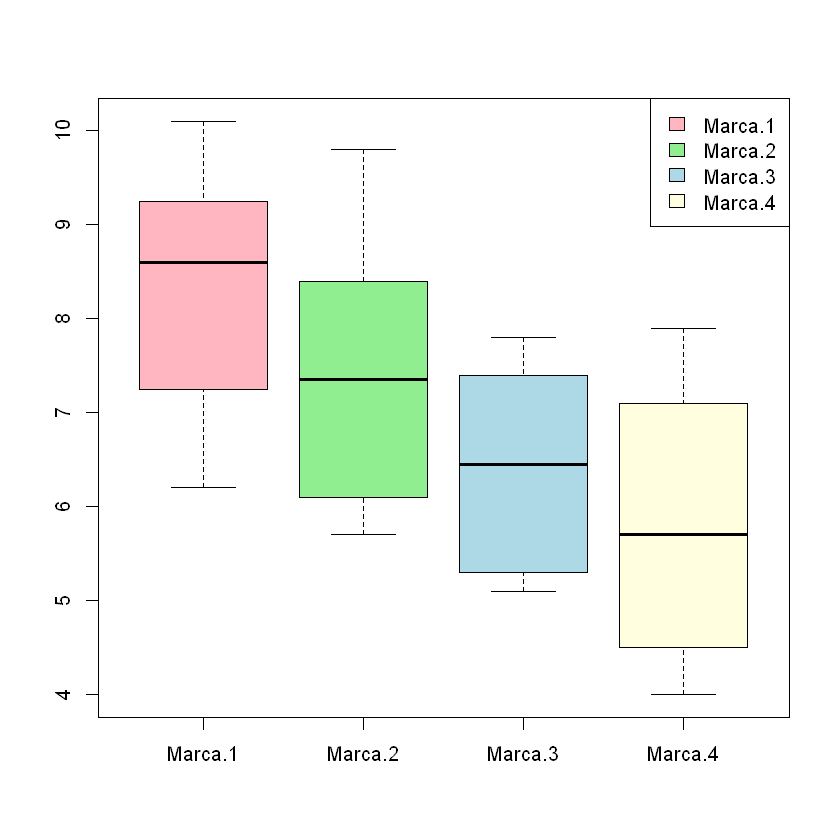

In [64]:
col <- c("lightpink","lightgreen", "lightblue", "lightyellow")

boxplot( te, col = col )
legend("topright", legend = colnames( te ), fill = col )

### Tabla de ANOVA

In [34]:
df_long <- te %>% gather(Category, Value)
anova_te <- aov( Value ~ Category, data = df_long )
summary( anova_te )

            Df Sum Sq Mean Sq F value Pr(>F)  
Category     3  22.93   7.645   3.791 0.0256 *
Residuals   21  42.35   2.016                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
3 observations deleted due to missingness

El test F rechaza la igualdad de medias a nivel 0.05. Ahora, antes de tomar una decisión, se debe estudiar si los supuestos del contraste se satisfacen con el objeto de ver si la conclusión es válida. Para ello se realiza el diagnóstico del modelo que será desarrollado luego.

### Inspección Analítica de la Homocedasticidad

### Test de Barlett

In [36]:
bartlett.test( te )


	Bartlett test of homogeneity of variances

data:  te
Bartlett's K-squared = 0.6168, df = 3, p-value = 0.8926


El test de Bartlett no rechaza la hipotesis de nulidad; es decir, no hay evidencia estadística significativa de que la varianza de alguno de los subgrupos difiera de las otras.

### Test de Levene

Esta prueba es un nuevo ANOVA sobre los valores absolutos de los residuos de las observaciones respecto de la mediana (media), de su grupo.

In [42]:
print( leveneTest( Value ~ Category, data = df_long ) )

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  3  0.2949 0.8286
      21               


Como el p-valor de la prueba es 0.8286, no se rechaza la hipótesis de homocedasticidad. Esto significa que el test de Levene no rechaza la hipótesis nula de homocedasticidad, lo que brinda la misma conclusión que el test de Bartlett. Por lo tanto, podemos suponer que se cumple la hipótesis de homocedasticidad.

### Análisis de la Normalidad de los residuos

In [43]:
shapiro.test( anova_te$residuals )


	Shapiro-Wilk normality test

data:  anova_te$residuals
W = 0.95307, p-value = 0.2937


### Gráfico de cuantil-cuantil

10 24 
10 22

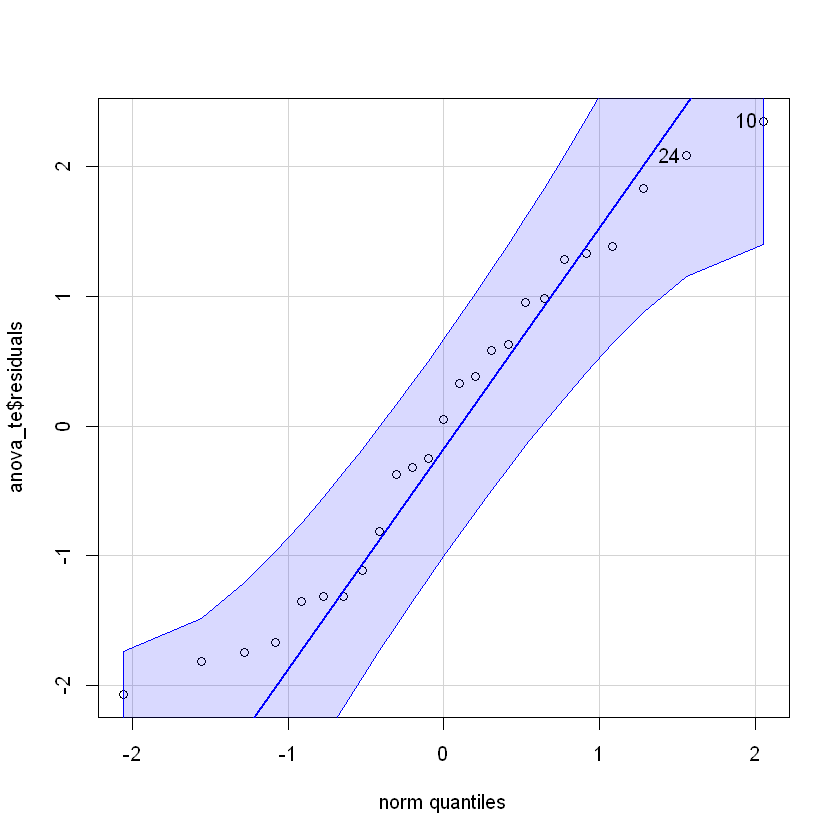

In [44]:
qqPlot( anova_te$residuals )

Si los datos fueran normales, los puntos que corresponden a las observaciones deberían posicionarse sobre la recta. Esto en la realidad no ocurrirá nunca, dado que se trata de una muestra aleatoria. Lo que debemos determinar es si el alejamiento observado de los puntos es significativo o no.

### Ejemplo: Dieta Conejos

Luego del experimento, los animales fueron sacrificados. En todos los casos se comprobaron lesiones aterog´enicas en la arteria aorta. Se midió el contenido de colesterol en la aorta en mg/g obteniéndose los siguientes resultados.

In [48]:
df <- data.frame(
  "Dieta 1" = c(13.4, 11.0, 15.3, 16.7, 13.4, 20.1, 13.6),
  "Dieta 2" = c(10.4, 14.2, 20.5, 19.6, 18.5, 24.0, 23.4),
  "Dieta 3" = c(7.5, 7.2, 6.7, 7.6, 11.2, 9.6, 6.8)
)

print( df )

  Dieta.1 Dieta.2 Dieta.3
1    13.4    10.4     7.5
2    11.0    14.2     7.2
3    15.3    20.5     6.7
4    16.7    19.6     7.6
5    13.4    18.5    11.2
6    20.1    24.0     9.6
7    13.6    23.4     6.8


In [50]:
summary_stats <- data.frame(
  Treatment = colnames(df),
  Media = apply(df, 2, mean),
  Desviación_típica = apply(df, 2, sd),
  n = apply(df, 2, length)
)

total_row <- c("Totales", Mean = mean(unlist(summary_stats$Media)),
               SD = sd(unlist(summary_stats$Desviación_típica)),
               n = sum(unlist(summary_stats$n)))
summary_stats <- rbind(summary_stats, total_row)

print( summary_stats )

        Treatment            Media Desviación_típica  n
Dieta.1   Dieta.1 14.7857142857143  2.93679449481265  7
Dieta.2   Dieta.2 18.6571428571429    4.888713921833  7
Dieta.3   Dieta.3 8.08571428571429  1.67971085947212  7
4         Totales 13.8428571428571  1.61699048492675 21


Realizamos un boxplot para apreciar gráficamente si existen diferencias entre los contenidos medios de colesterol en la aorta de las dietas y, también ver si hay presencia de outliers en las distribuciones o asimetrías y si tiene sentido pensar que las varianzas son iguales.

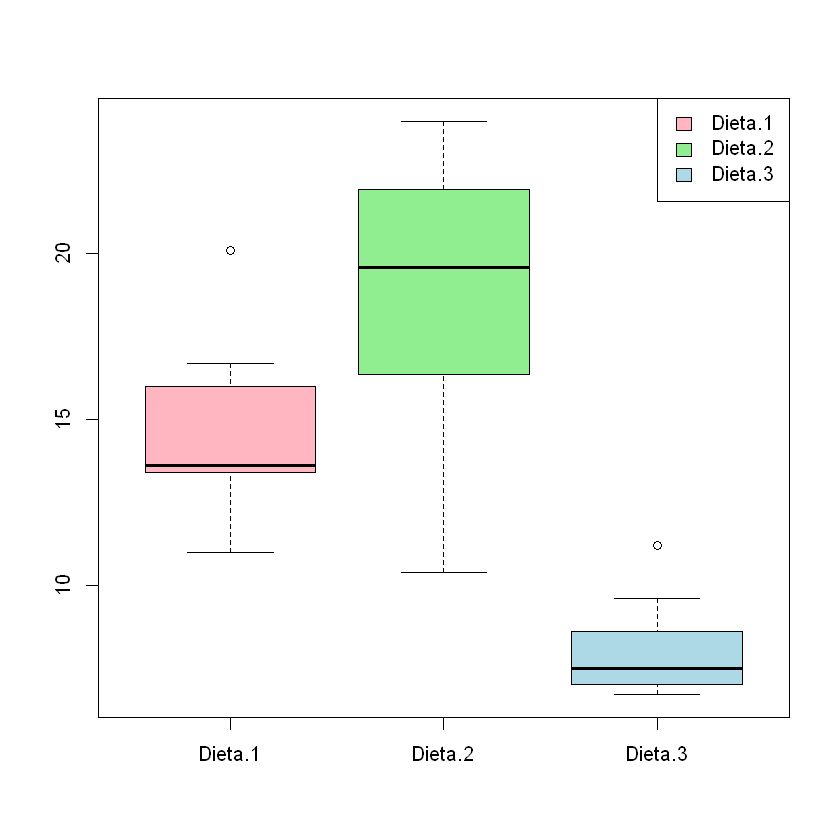

In [61]:
col <- c("lightpink","lightgreen", "lightblue")

boxplot( df, col = col )
legend("topright", legend = colnames( df ), fill = col )

En el boxplot se aprecia que las varianzas no parecen ser similares. No se observan outliers en ninguno de los diagramas de caja. Ahora, para comprobar si estas sospechas tienen significación estadística, vamos a ensayar la prueba de Levene.

In [66]:
df_long <- df %>% gather(Dieta, Value)
anova_df <- aov( Value ~ Dieta, data = df_long )
summary( anova_df )

            Df Sum Sq Mean Sq F value   Pr(>F)    
Dieta        2  400.5  200.24      17 7.15e-05 ***
Residuals   18  212.1   11.78                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Análisis de la Normalidad de los Residuos

Esta salida indica que las diferencias entre los diámetros aórticos de los conejos sometidos a las distintas dietas son diferentes. Sin embargo, estos resultados sólo serán válidos si se satisfacen los supuestos del modelo de análisis de la varianza.

### Test Shapiro-Wilk

In [69]:
shapiro.test( anova_df$residuals )


	Shapiro-Wilk normality test

data:  anova_df$residuals
W = 0.94686, p-value = 0.2967


Esta salida indica que puede sostenerse el supuesto de normalidad distribucional de los residuos.

### Test Levene

In [70]:
print( leveneTest( Value ~ Dieta, data = df_long ) )

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  2  1.8214 0.1904
      18               


De esta última salida se interpreta que no es posible suponer homocedasticidad en la distribución de los residuos.

### Transformación de la Variable Respuesta

Para decidir el exponente de la transformación aplicamos el test de Box & Cox.

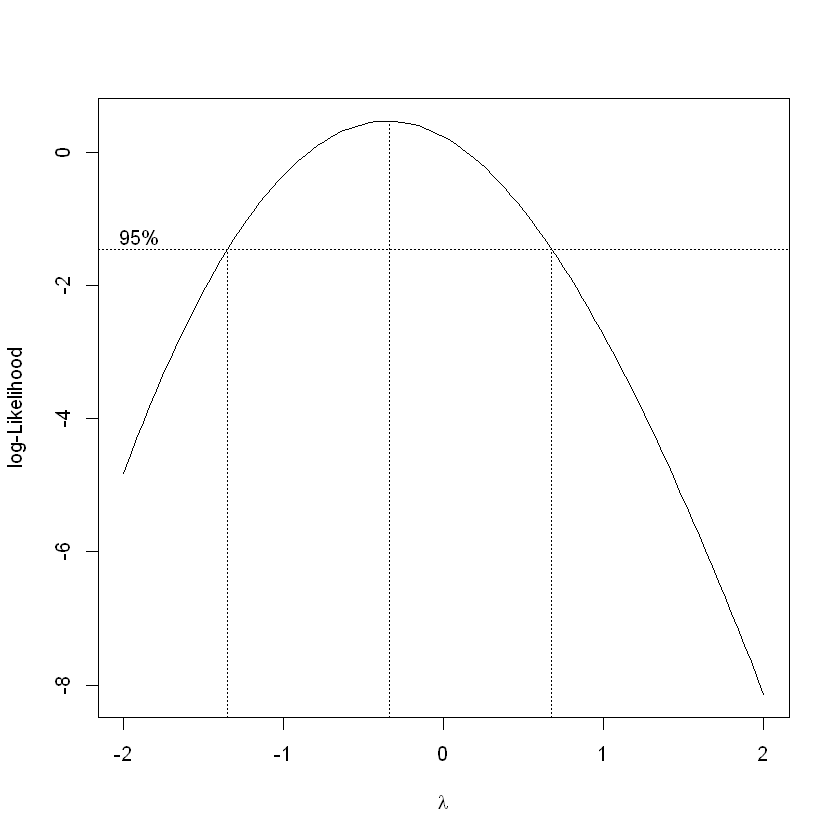

In [78]:
bc <- boxcox( Value ~ Dieta, lambda = -2:2, data = df_long )

La salida de este test sugiere una transformación de la variable respuesta con un exponente cercano a −0.5.

In [77]:
lambda <- bc$x[ which.max(bc$y) ]
lambda

[1] -0.3434343

Realizamos la transformación sugerida y un nuevo análisis de la varianza, que origina nuevas salidas.

In [79]:
#Arreglar la transformación
anova_df2 <- aov( ( ( Value^(lambda) - 1 ) / lambda ) ~ Dieta, data = df_long )
summary( anova_df2 )

            Df Sum Sq Mean Sq F value   Pr(>F)    
Dieta        2 0.4642 0.23210   25.18 6.08e-06 ***
Residuals   18 0.1659 0.00922                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

En esta salida se aprecia que las diferencias siguen siendo significativas aín con los datos transformados. Falta realizar el análisis diagnóstico del modelo para los nuevos datos.

### Supuesto de Normalidad

In [80]:
shapiro.test( anova_df2$residuals )


	Shapiro-Wilk normality test

data:  anova_df2$residuals
W = 0.97672, p-value = 0.8717


Se cumple el supuesto de normalidad requerido para el modelo de análisis de la varianza para los datos transformados.

### Supuesto de homocedasticidad

In [82]:
print( leveneTest( anova_df2 ) )

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  2  0.1987 0.8216
      18               


También se cumple el supuesto de homocedasticidad, se testearon los residuos respecto de la mediana.

Nos preguntamos por último, cuáles son las dietas que difieren entre sí. Realizamos comparaciones a posteriori con intervalos de Tukey.

### Tukey

In [86]:
TukeyHSD( anova_df2 )

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ((Value^(lambda) - 1)/lambda) ~ Dieta, data = df_long)

$Dieta
                       diff         lwr        upr     p adj
Dieta.2-Dieta.1  0.07937528 -0.05158837  0.2103389 0.2936005
Dieta.3-Dieta.1 -0.26811760 -0.39908125 -0.1371540 0.0001616
Dieta.3-Dieta.2 -0.34749288 -0.47845653 -0.2165292 0.0000069


De donde se puede apreciar que la Dieta 3 produce niveles de colesterol inferiores a los de las otras dos dietas. Más aún, los dos últimos intervalos no contienen al 0, lo cual indica que la Dieta 3 es diferente de las Dietas 1 y 2.

## Ejemplo: Calificaciones

In [97]:
df <- data.frame(
  "A" = c(13, 27, 26, 22, 28, 27, NaN),
  "B" = c(43, 35, 47, 32, 31, 37, NaN),
  "C" = c(33, 33, 33, 26, 44, 33, 54)
)

print( df )

    A   B  C
1  13  43 33
2  27  35 33
3  26  47 33
4  22  32 26
5  28  31 44
6  27  37 33
7 NaN NaN 54


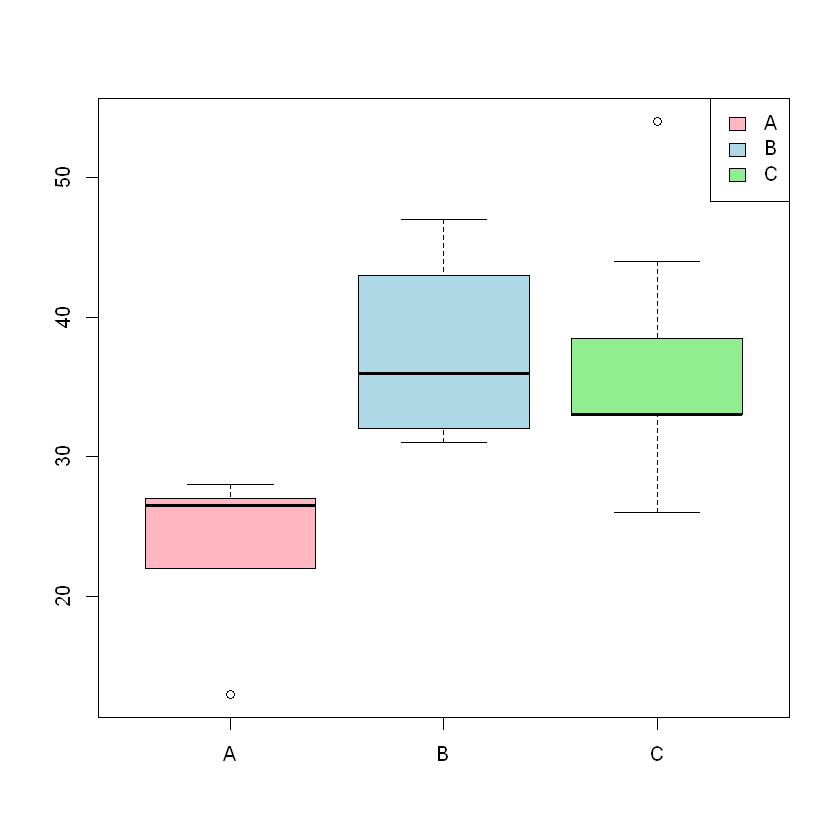

In [100]:
col <- c("lightpink", "lightblue", "lightgreen" )

boxplot( df, col = col )
legend("topright", legend = colnames( df ), fill = col )

Estos datos son esencialmente discretos. Además se rechaza la hipótesis de normalidad Por ende, aplicamos un análisis no paramétrico mediante el test de Kruskal-Wallis.

## Ejemplo: Calificaciones

Los datos ordenados y sus rankeamientos:

In [1]:
# Create the dataframe
df <- data.frame(
  X = c(13, 22, 26, 27, 27, 28, 31, 32, 35, 37, 43, 47, 26, 33, 33, 33, 33, 44, 54, 33, 44),
  G = c("A", "A", "A", "A", "A", "A", "A", "B", "B", "B", "B", "B", "C", "C", "C", "C", "C", "C", "C", "C", "C"),
  Rgo = c(1, 2, 3.5, 5.5, 5.5, 7, 8, 9, 14, 15, 16, 18, 3.5, 11.5, 11.5, 11.5, 11.5, 17, 19, 11.5, 17)
)

# Print the dataframe
print(df)

    X G  Rgo
1  13 A  1.0
2  22 A  2.0
3  26 A  3.5
4  27 A  5.5
5  27 A  5.5
6  28 A  7.0
7  31 A  8.0
8  32 B  9.0
9  35 B 14.0
10 37 B 15.0
11 43 B 16.0
12 47 B 18.0
13 26 C  3.5
14 33 C 11.5
15 33 C 11.5
16 33 C 11.5
17 33 C 11.5
18 44 C 17.0
19 54 C 19.0
20 33 C 11.5
21 44 C 17.0


In [5]:
print( kruskalmc( df$Rgo ~ df$G ) )

Multiple comparison test after Kruskal-Wallis 
alpha: 0.05 
Comparisons
      obs.dif critical.dif stat.signif
A-B 10.757143     8.697761        TRUE
A-C  8.857143     7.485840        TRUE
B-C  1.900000     8.285307       FALSE


A partir de esta última salida, surge que las diferencias de las distribuciones son estadísticamente significativas y que el grupo A difiere
significativamente de los grupos B y C, mientras que los grupos B y C no difieren significativamente entre sí.

## 3. Dos Factores Cruzados

## Ejemplo: Resistencia

Una empresa de materiales de construcción quiere estudiar la influencia que tienen el grosor y el tipo de templado sobre la resistencia máxima de
unas láminas de acero. Para ello miden el estrés hasta la rotura (variable cuantitativa dependiente) para dos tipos de templado (lento y rápido) y
tres grosores de lámina (8mm, 16mm y 24 mm).

In [7]:
resistencia <- c(
    15.29, 15.89, 16.02, 16.56, 15.46, 16.91, 16.99, 17.27, 16.85, 16.35, 
    17.23, 17.81, 17.74, 18.02, 18.37, 12.07, 12.42, 12.73, 13.02, 12.05, 
    12.92, 13.01, 12.21, 13.49, 14.01, 13.30, 12.82, 12.49, 13.55, 14.53
)

templado <- c( rep( c( "rapido", "lento" ), c( 15, 15 ) ) )
grosor<- rep( c( 8, 16, 24 ), each = 5, times = 2)
datos<- data.frame( templado = templado, grosor = as.factor( grosor ), resistencia = resistencia )
print( head( datos ) )

  templado grosor resistencia
1   rapido      8       15.29
2   rapido      8       15.89
3   rapido      8       16.02
4   rapido      8       16.56
5   rapido      8       15.46
6   rapido     16       16.91


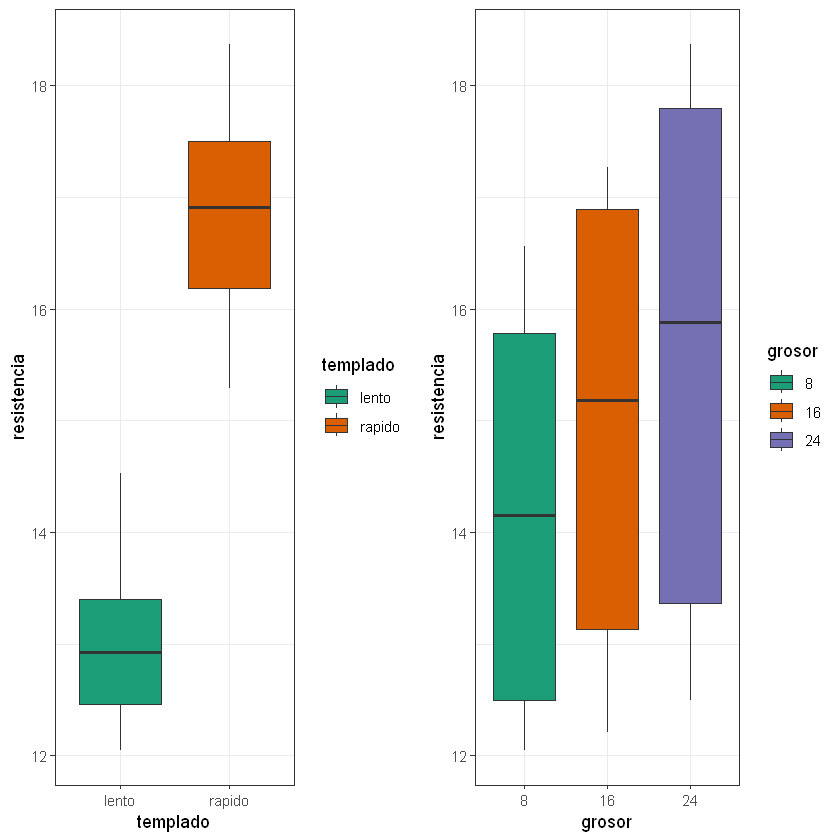

In [11]:
suppressMessages( library( gridExtra) )

p1 <- ggplot( data = datos, aes( x = templado, y = resistencia, fill = templado ) ) + 
geom_boxplot() +
theme_bw() +
scale_fill_brewer( palette = 'Dark2' )

p2 <- ggplot( data = datos, aes( x = grosor, y = resistencia, fill = grosor ) ) + 
geom_boxplot() + 
theme_bw() +
scale_fill_brewer( palette = 'Dark2' )

p3 <- ggplot( data = datos, aes( x = templado, y = resistencia, colour = grosor ) ) + 
geom_boxplot() +
theme_bw()+
scale_fill_brewer( palette = 'Dark2' )

grid.arrange( p1, p2, ncol = 2 )

En primer lugar se generan los diagramas “Boxplot” para identificar posibles diferencias significativas, asimetrías, valores atípicos y
homogeneidad de varianza entre los distintos niveles.

### Visualizando los efectos de ambos factores simultaneamente

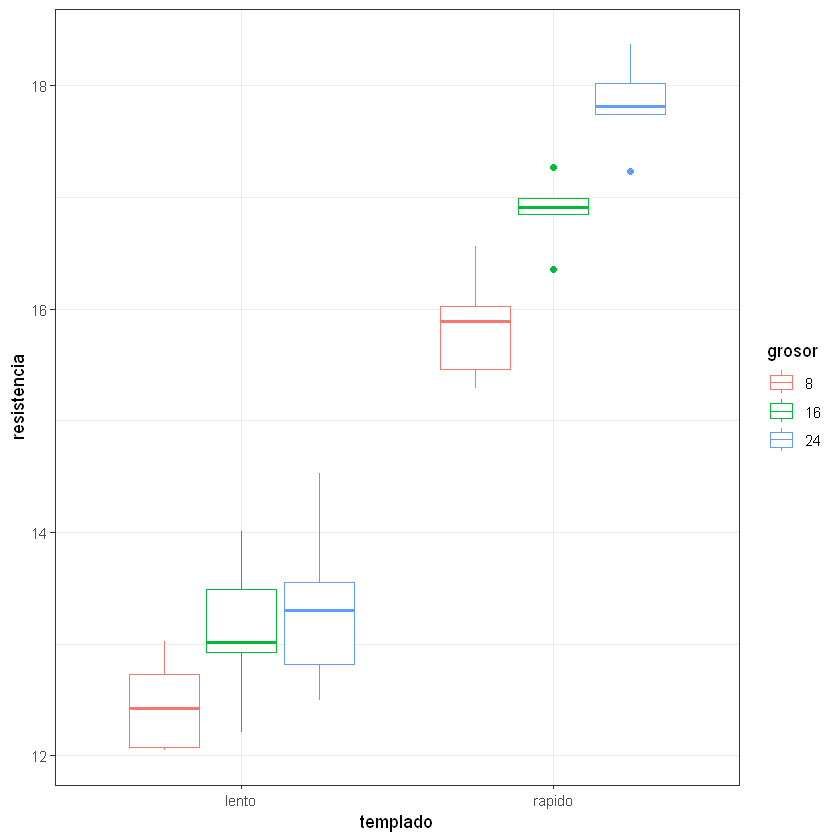

In [12]:
p3

### Resúmenes Básicos de la Variable objetivo por Factores

In [15]:
with( data = datos, expr = tapply( resistencia, templado, mean ) )
with( data = datos, expr = tapply( resistencia, templado, sd ) )
with( data = datos, expr = tapply( resistencia, grosor, mean ) )
with( data = datos, expr = tapply( resistencia, grosor, sd ) )

print( with( data = datos, expr = tapply( resistencia, list( templado, grosor ), mean ) ) )
print( with( data = datos, expr = tapply( resistencia, list( templado, grosor ), sd ) ) )

lento   rapido 
12.97467 16.85067

lento    rapido 
0.7113455 0.9276427

8     16     24 
14.151 15.001 15.586

8       16       24 
1.836993 2.036797 2.442354

            8     16     24
lento  12.458 13.128 13.338
rapido 15.844 16.874 17.834
               8        16        24
lento  0.4207969 0.6724730 0.7833709
rapido 0.5000300 0.3341856 0.4171690


## Gráfico de Interacción

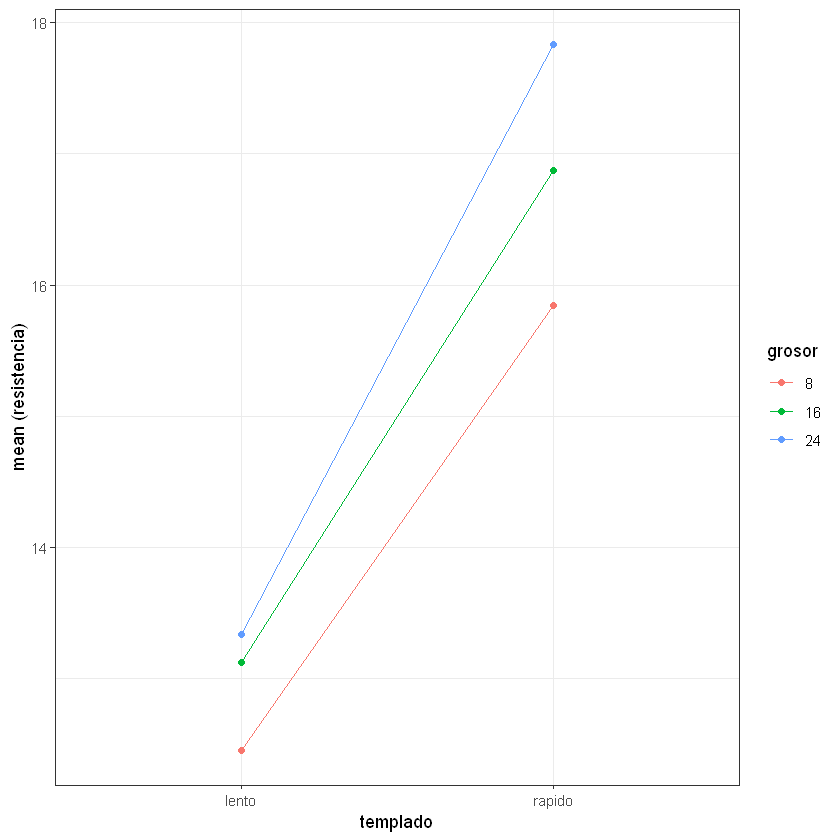

In [16]:
ggplot( data = datos, 
    aes( x = templado, y = resistencia, colour = grosor, group = grosor) ) +
    stat_summary( fun = mean, geom = 'point' ) +
    stat_summary( fun = mean, geom = 'line' ) +
    labs( y =  'mean (resistencia)' ) + 
    theme_bw()

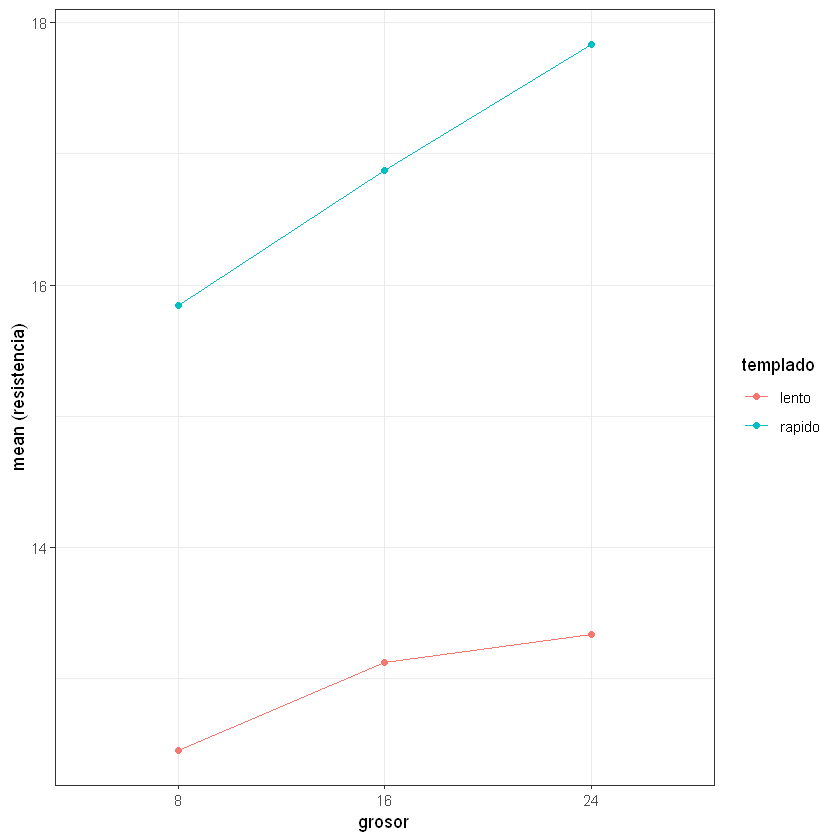

In [10]:
ggplot( data = datos, 
    aes( x = grosor, y = resistencia, colour = templado, group = templado ) ) +
    stat_summary( fun = mean, geom = 'point' ) +
    stat_summary( fun = mean, geom = 'line' ) +
    labs( y = 'mean (resistencia)') +
    theme_bw()

### Estimamos los coeficientes del Modelo

In [18]:
anova <- aov( resistencia ~ templado * grosor, data = datos )
summary( anova )

                Df Sum Sq Mean Sq F value   Pr(>F)    
templado         1 112.68  112.68 380.082 3.19e-16 ***
grosor           2  10.41    5.21  17.563 2.00e-05 ***
templado:grosor  2   1.60    0.80   2.705   0.0873 .  
Residuals       24   7.11    0.30                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

El análisis de varianza confirma que existe una influencia significativasobre la resistencia de las láminas por parte de ambos factores (templado y grosor) con tamaños de efecto η2 grande y mediano respectivamente, pero que no existe interacción significativa entre ellos.

### ETA Cuadrado

In [20]:
print( etaSquared( anova ) )

                    eta.sq eta.sq.part
templado        0.85485219   0.9406061
grosor          0.07900327   0.5940887
templado:grosor 0.01216553   0.1839235


## 4. Regresión de Cuantiles

## Ejemplo Simulado

`geom_smooth()` using formula = 'y ~ x'


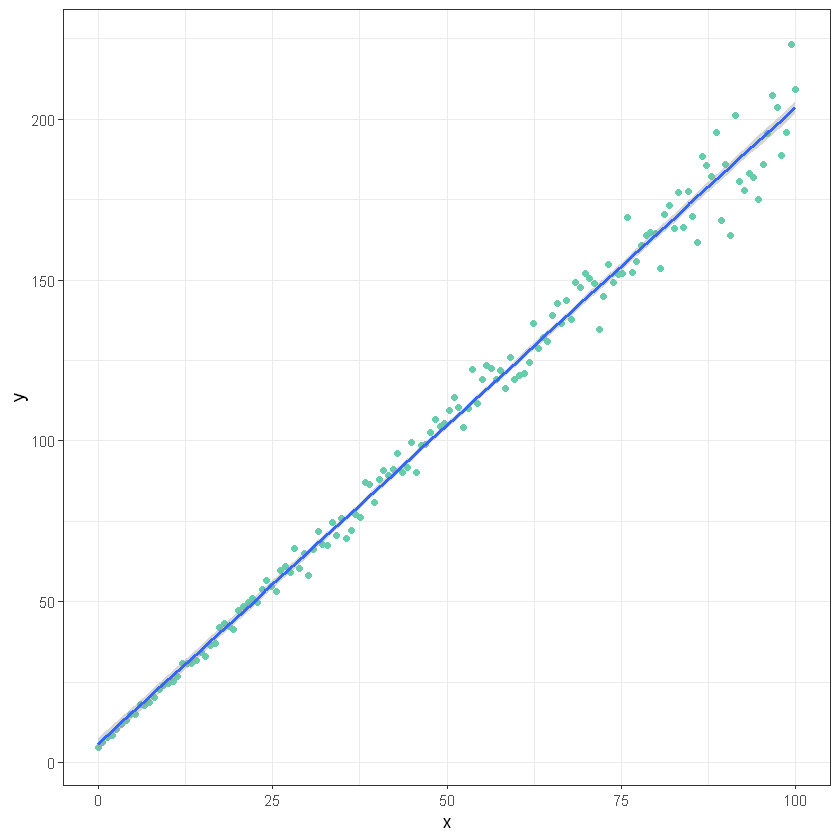

In [23]:
# Generamos una base de datos con varianza no constante

set.seed( 3 ) # fijamos una semilla para replicabilidad
x <- seq( 0, 100, length.out = 150 ) # variable independiente
dst <- 0.2 + 0.1 * x # varianza no constante
b0 <- 5 # intercepto teórico
b1 <- 2 # pendiente teórica
err <- rnorm( 150, mean = 0, sd = dst ) # errores normales
y <- b0 + b1 * x + err # variable dependiente
base <- data.frame( x,y ) # armamos la base de datos

p1 <- ggplot( base, aes( x, y )) + 
    geom_point( color = 'aquamarine3' ) +
    geom_smooth( method = 'lm', level = 0.95 ) + 
    theme_bw() 
p1

### Estimamos y visualizamos los cuantiles

`geom_smooth()` using formula = 'y ~ x'
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x
Smoothing formula not specified. Using: y ~ x


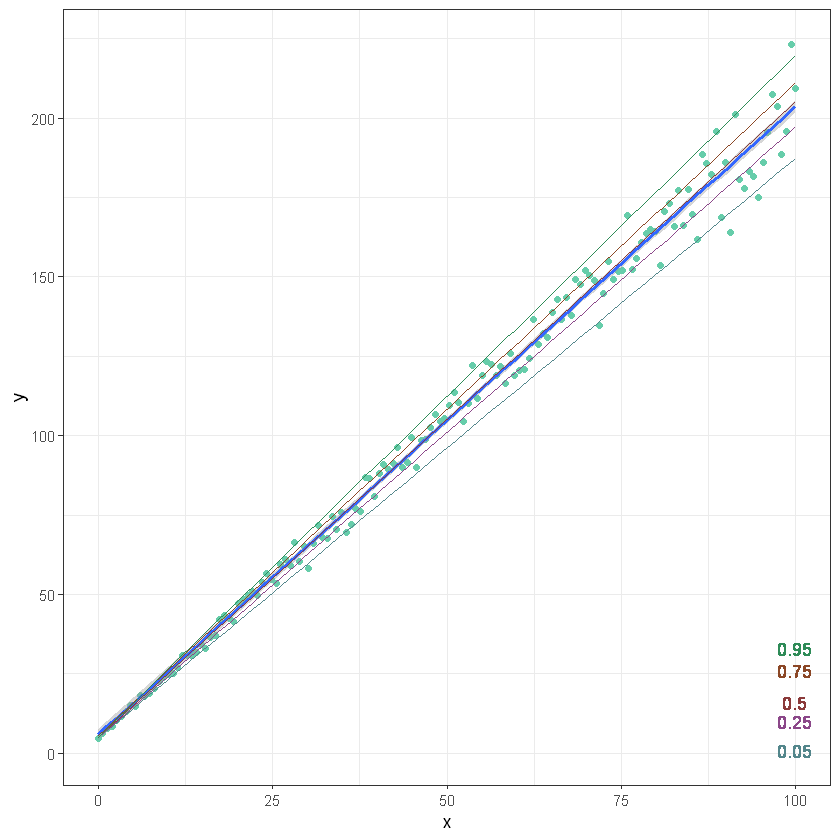

In [23]:
p1 + geom_quantile( quantiles = 0.05, color = 'cadetblue4' ) +
    geom_text( aes( x = 100, y = 1, label = '0.05' ), color = 'cadetblue4' ) +
    geom_quantile( quantiles = 0.25, color = 'orchid4' ) +
    geom_text( aes( x = 100, y = 10, label = '0.25' ), color = 'orchid4' ) +
    geom_quantile( quantiles = 0.50, color = 'indianred4' ) +
    geom_text( aes( x = 100, y = 16, label = '0.5' ), color = 'indianred4' ) +
    geom_quantile( quantiles = 0.75, col = 'sienna4' ) +
    geom_text( aes( x = 100, y = 26, label = '0.75' ), color = 'sienna4') +
    geom_quantile( quantiles = 0.95, color = 'seagreen4' ) +
    geom_text( aes( x = 100, y = 33, label = '0.95' ), color = 'seagreen4' )

### Estimación de los coeficientes de la regresión

Si estamos interesados en la estimación de los coeficientes de la regresión:

In [27]:
# Indicamos los cuantiles que nos interesan
qs <- seq( 0.1, 0.9, by = 0.1 )

# Estimamos estos cuantiles
qr2 <- rq( y ~ x, data = base, tau = qs )

# Pedimos los coeficientes de las rectas estimadas
print( t(coef( qr2 )) )

         (Intercept)        x
tau= 0.1    4.917353 1.867427
tau= 0.2    4.950251 1.910740
tau= 0.3    4.965637 1.934776
tau= 0.4    5.072489 1.958524
tau= 0.5    5.011732 2.001312
tau= 0.6    5.017998 2.027460
tau= 0.7    5.529391 2.046512
tau= 0.8    5.422130 2.069343
tau= 0.9    5.203141 2.115957


## Ejemplo: Tiempos

Supóngase que se dispone de dos grupos de estudiantes a los que se le asignó la misma tarea y se registró en cada caso el tiempo que tardaron en resolverla. Queremos comparar los tiempos medianos de las muestras correspondientes a ambos grupos.

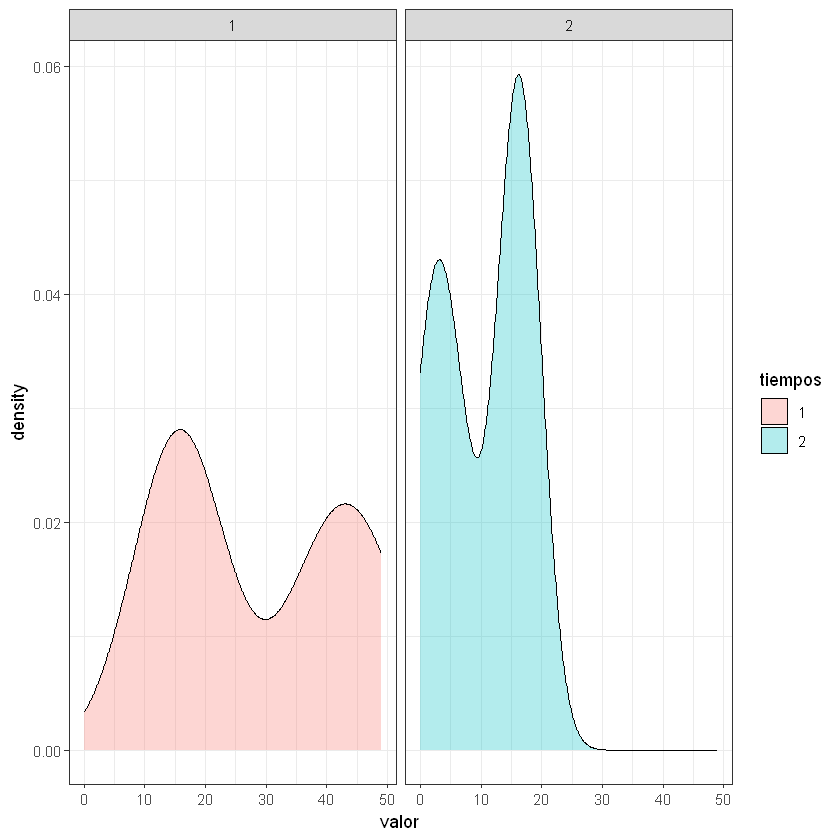

In [30]:
# Cargamos los datos y visualizamos las dos distribuciones
tiempos1 <- c( 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.0, 38.3, 39.5, 40.0, 43.0, 45.0, 49.0, 48.0 )
tiempos2 <- c( 0,1.1,2.7, 3.2, 3.3, 5.4, 7.5, 16, 16.1, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6 )
todos <- data.frame( tiempos = c( rep ('1', 15 ), rep( '2', 15 ) ),
valor <- c( tiempos1, tiempos2 ) )

p1 <- ggplot( todos, aes( x = valor, fill = tiempos ) ) +
    geom_density( alpha = 0.3 ) + facet_grid( . ~ tiempos ) +
    theme_bw()
p1

El segundo grupo es claramente asimétrico por lo cual el t-test no resultaría adecuado. Como las formas distribucionales son diferentes tampoco es apropiado el test de Mann–Whitney–Wilcoxon.

In [31]:
# Calculamos la mediana de cada grupo y luego aplicamos la prueba de Mann Whitney-Wilcoxon
median( tiempos1 )
median( tiempos2 )
wilcox.test( tiempos1, tiempos2 )

[1] 16

[1] 16

Warning message in wilcox.test.default(tiempos1, tiempos2):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  tiempos1 and tiempos2
W = 162, p-value = 0.042
alternative hypothesis: true location shift is not equal to 0


In [34]:
# Ajustamos un modelo de regresión para la mediana con la predictora categórica del grupo
mod_q50 <- rq( valor ~ tiempos, tau = 0.5, data = todos )
summary( mod_q50, se = 'boot')


Call: rq(formula = valor ~ tiempos, tau = 0.5, data = todos)

tau: [1] 0.5

Coefficients:
            Value    Std. Error t value  Pr(>|t|)
(Intercept) 16.00000 11.22531    1.42535  0.16511
tiempos2     0.00000 12.62348    0.00000  1.00000

El resultado no muestra evidencias en contra de la hipótesis nula de que las medianas de ambos grupos son iguales. También puede observarse que la mediana de ambos grupos es la misma.